In [1]:
from __future__ import print_function

# default first cell - Zack Li
%matplotlib inline
# fix DPI issues on mac
%config InlineBackend.figure_format = 'retina'
 # autoreload workflow, reload modules every time cell is run
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors
import matplotlib
matplotlib.rcParams['figure.figsize'] = 8,8 # have to fix figure size due to backend


In [2]:
c1 = np.load('bootstrap_samples/meancube.npy')
c2 = np.load('bootstrap_samples/meancube2.npy')
c3 = np.load('bootstrap_samples/meancube3.npy')
c4 = np.load('bootstrap_samples/meancube4.npy')
c5 = np.load('bootstrap_samples/meancube5.npy')
c6 = np.load('bootstrap_samples/meancube6.npy')
c = np.concatenate( [c1,c2,c3,c4,c5,c6], axis=0)

In [ ]:
cropped_c = c[:,70:220,550:650]
plt.imshow( np.arcsinh(cropped_c[0,:,:]) )

x1, y1 = 50, 35
x2, y2 = 50, 50
x3, y3 = 18, 80
plt.scatter([x1,x2,x3],[y1,y2,y3], marker='.', color=default_color_list[1], alpha=0.5)

In [ ]:

plt.hist( cropped_c[:,y1,x1], histtype='step', lw=2, label='Data', bins=25, range=(-30,100) )
plt.hist( cropped_c[:,y2,x2], histtype='step', lw=2, label='Noise', bins=25, range=(-30,100) )
plt.hist( cropped_c[:,y3,x3], histtype='step', lw=2, label='Cosmic Ray', bins=25, range=(-30,100) )
plt.ylim(0,180)
plt.legend()
plt.xlabel('Mean Flux')

In [ ]:
from scipy import stats
from astropy.stats import sigma_clip

crop1 = cropped_c[:,y1,x1]
crop2 = cropped_c[:,y2,x2]
crop3 = cropped_c[:,y3,x3]

plt.hist( crop1, histtype='step', normed=True,
         lw=2, label='Data', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop2, histtype='step', normed=True,
         lw=2, label='Noise', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop3, histtype='step', normed=True,
         lw=2, label='Cosmic Ray', bins=25, range=(-30,100), alpha=0.2 )

gaussian = lambda x, mu, sigma: np.exp(-0.5 * ((x-mu)/sigma)**2 ) / sigma / np.sqrt(2.* np.pi)

xx = np.linspace(-30,100,1000)
plt.plot( xx, gaussian(xx, 
                       np.mean(crop1), 
                       np.std(crop1)), color=default_color_list[0] )
plt.plot( xx, gaussian(xx, 
                       np.mean(crop2), 
                       np.std(crop2)), color=default_color_list[1] )
plt.plot( xx, gaussian(xx, 
                       np.mean(crop3), 
                       np.std(crop3)), color=default_color_list[2] )


plt.ylim(0,0.05)
plt.legend()
plt.xlabel('Mean Flux')

In [ ]:
from scipy.stats import norm
from scipy import stats
from astropy.stats import sigma_clip

crop1 = cropped_c[:,y1,x1]
crop2 = cropped_c[:,y2,x2]
crop3 = cropped_c[:,y3,x3]

plt.hist( crop1, histtype='step', normed=True,
         lw=2, label='Data', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop2, histtype='step', normed=True,
         lw=2, label='Noise', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop3, histtype='step', normed=True,
         lw=2, label='Cosmic Ray', bins=25, range=(-30,100), alpha=0.2 )

gaussian = lambda x, mu, sigma: np.exp(-0.5 * ((x-mu)/sigma)**2 ) / sigma / np.sqrt(2.* np.pi)

xx = np.linspace(-30,100,1000)

from astropy.modeling import models, fitting

plt.plot( xx, gaussian(xx,mu,sig), color=default_color_list[0] )
mu, sig = norm.fit(crop2)
plt.plot( xx, gaussian(xx,mu,sig), color=default_color_list[1] )
mu, sig = norm.fit(crop3)
plt.plot( xx, gaussian(xx,mu,sig), color=default_color_list[2] )


plt.ylim(0,0.05)
plt.legend()
plt.xlabel('Mean Flux')

In [ ]:
from scipy import stats
from astropy.stats import sigma_clip

crop1 = sigma_clip(cropped_c[:,y1,x1])
crop2 = sigma_clip(cropped_c[:,y2,x2])
crop3 = sigma_clip(cropped_c[:,y3,x3])

plt.hist( crop1, histtype='step', normed=True,
         lw=2, label='Data', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop2, histtype='step', normed=True,
         lw=2, label='Noise', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop3, histtype='step', normed=True,
         lw=2, label='Cosmic Ray', bins=25, range=(-30,100), alpha=0.2 )

gaussian = lambda x, mu, sigma: np.exp(-0.5 * ((x-mu)/sigma)**2 ) / sigma / np.sqrt(2.* np.pi)

xx = np.linspace(-30,100,1000)
plt.plot( xx, gaussian(xx, 
                       np.mean(crop1), 
                       np.std(crop1)), color=default_color_list[0] )
plt.plot( xx, gaussian(xx, 
                       np.mean(crop2), 
                       np.std(crop2)), color=default_color_list[1] )
plt.plot( xx, gaussian(xx, 
                       np.mean(crop3), 
                       np.std(crop3)), color=default_color_list[2] )


# plt.ylim(0,180)
plt.legend()
plt.xlabel('Mean Flux')

In [ ]:
from scipy import stats
from astropy.stats import sigma_clip

crop1 = sigma_clip(cropped_c[:,y1,x1], sigma=2)
crop2 = sigma_clip(cropped_c[:,y2,x2], sigma=2)
crop3 = sigma_clip(cropped_c[:,y3,x3], sigma=2)

plt.hist( crop1, histtype='step', normed=True,
         lw=2, label='Data', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop2, histtype='step', normed=True,
         lw=2, label='Noise', bins=25, range=(-30,100), alpha=0.2 )
plt.hist( crop3, histtype='step', normed=True,
         lw=2, label='Cosmic Ray', bins=25, range=(-30,100), alpha=0.2 )

gaussian = lambda x, mu, sigma: np.exp(-0.5 * ((x-mu)/sigma)**2 ) / sigma / np.sqrt(2.* np.pi)

xx = np.linspace(-30,100,1000)
plt.plot( xx, gaussian(xx, 
                       np.mean(crop1), 
                       np.std(crop1)), color=default_color_list[0] )
plt.plot( xx, gaussian(xx, 
                       np.mean(crop2), 
                       np.std(crop2)), color=default_color_list[1] )
plt.plot( xx, gaussian(xx, 
                       np.mean(crop3), 
                       np.std(crop3)), color=default_color_list[2] )


# plt.ylim(0,180)
plt.legend()
plt.xlabel('Mean Flux')

In [10]:
from astropy.stats import sigma_clip

l, w, h = c.shape
print(l, w, h)
noise = np.zeros((w, h))

for i in range(w):
    print(str(i), end='\r')
    for j in range(h):
        noise[i,j] = np.std(sigma_clip(c[:,i,j], sigma=2))

900 294 2502


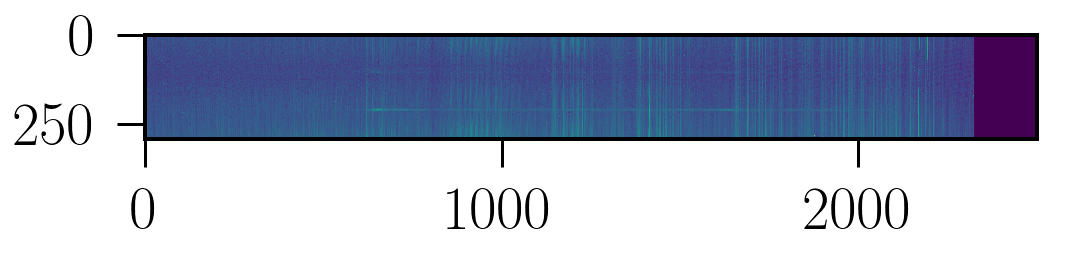

In [13]:
plt.imshow(  np.arcsinh(noise) )
np.save('bootstrapped_noise.npy', noise)

In [ ]:
plt.hist(noise)